# Emotion Recogination By Text






1.   Text Analysis
2.   Sentiment Analysis




### Importing Necessary **Libraries**

In [497]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sentimental Anaylisi
from textblob import TextBlob

# Additional libraries
!pip install neattext
import neattext.functions as nfx
from collections import Counter

# Load Text Cleaning Pkgs
!pip install wordcloud
from wordcloud import WordCloud

### Loading The **Dataset**

In [498]:
df = pd.read_csv("https://raw.githubusercontent.com/Jaggenaut/Emotion_detection-by-text/main/emotion_dataset_raw.csv")

# Defining The **Functions**

### All the functions used below are defined here.

### ***`To Perform Sentimental Analysis Using TextBlob`***

In [499]:
# Function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    # Create a TextBlob object to analyze sentiment in the given text
    blob = TextBlob(text)

    # Get the polarity score for sentiment analysis
    sentiment = blob.sentiment.polarity

    # Determine the sentiment based on the polarity score
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"

    # Return the sentiment result
    return result


### ***`To Extract The Most Common KeyWords From a Text`***

In [500]:
# Function to extract the most common keywords from a text
def extract_keywords(text, num=50):
    # Split the text into tokens (words)
    tokens = [tok for tok in text.split()]

    # Count the frequency of each token
    token_counts = Counter(tokens)

    # Get the most common 'num' tokens and their counts as a dictionary
    most_common_tokens = dict(token_counts.most_common(num))

    # Return the dictionary of most common tokens and their counts
    return most_common_tokens


### ***`Function To Plot The Most Common Keywords`***

In [501]:
# Function to plot the most common keywords
def plot_most_common_words(mydict, emotion_name):
    # Create a DataFrame from the input dictionary
    df_01 = pd.DataFrame(mydict.items(), columns=['token', 'count'])

    # Set the figure size and title for the plot
    plt.figure(figsize=(20, 10))
    plt.title("Plot of {} Most Common Keywords".format(emotion_name))

    # Create a bar plot using Seaborn
    sns.barplot(x='token', y='count', data=df_01)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


### ***`To Generate And Plot Word Cloud`***

In [502]:
# Function to generate and plot a word cloud
def plot_wordcloud(docx):
    # Generate a word cloud from the input text
    mywordcloud = WordCloud().generate(docx)

    # Set the figure size
    plt.figure(figsize=(20, 10))

    # Display the word cloud image with interpolation
    plt.imshow(mywordcloud, interpolation='bilinear')

    # Hide the axis labels
    plt.axis('off')

    # Show the word cloud plot
    plt.show()


### `Predticting the Emotion `

In [503]:
def predict_emotion(sample_text,model):
  # Transform the array of sample texts into vectors using the provided CountVectorizer (cv)
    myvect = cv.transform(sample_text).toarray()

    # Make predictions for the array of sample texts using the model
    predictions = model.predict(myvect)

    # Get the probability distributions for all classes for each sample
    pred_proba = model.predict_proba(myvect)

    # Create a list of dictionaries, each containing predicted probabilities for one sample
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba))

    # Return the list of dictionaries with predicted probabilities for each sample
    return pred_percentage_for_all

### Making Confusion Matrix

In [504]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def calculate_and_display_confusion_matrix(y_true, y_pred):
    # Calculate the confusion matrix
    my_confusion_matrix = confusion_matrix(y_true, y_pred)

    # Display the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=my_confusion_matrix)
    disp.plot(cmap=plt.cm.Blues)  # You can customize the color map if needed
    plt.title('Confusion Matrix')
    plt.show()

### ***`Previewing The Dataset`***






In [505]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

### ***`Shape of Dataset`***



In [506]:
df.shape

(34792, 2)

### ***`Datatype`***



In [507]:
df.dtypes

Emotion    object
Text       object
dtype: object

### ***`Checking For the Missing Values`***



In [508]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

### ***`Value Count of The Dataset`***



In [509]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

### ***`Plots Of the Datset - Bar & CountPlot`***



<Axes: >

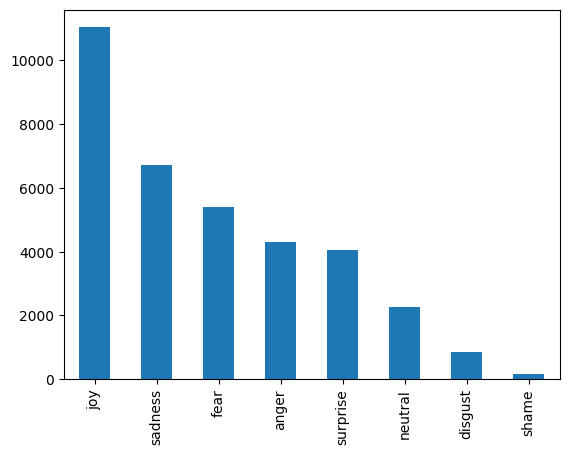

In [510]:
df['Emotion'].value_counts().plot(kind='bar')

This makes it clear that the dataset we are using is not uniformly distibuted for all the emotions and this might cause us some trouble as the ML algorithm might not detect the patterns for the emotions which have vary few examples.

<Axes: xlabel='Emotion', ylabel='count'>

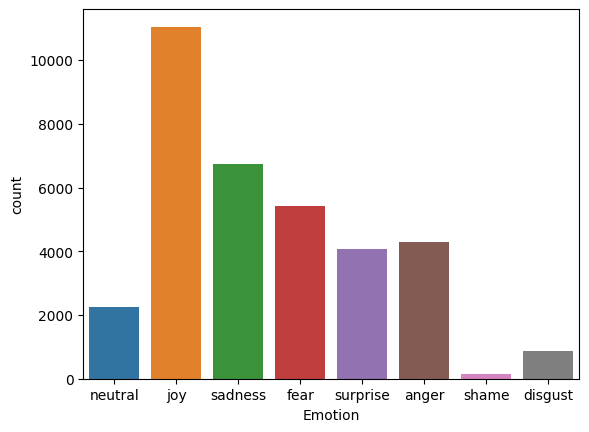

In [511]:
sns.countplot(x='Emotion',data=df)

### `Testing the function get_sentiment`

In [512]:
get_sentiment("I Love Machine Learning")

'Positive'

### `Using our Function on dataset`

In [513]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [514]:
df.head()

Emotion                                               Text Sentiment
0  neutral                                             Why ?    Neutral
1      joy    Sage Act upgrade on my to do list for tommorow.   Neutral
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  Negative
3      joy   Such an eye ! The true hazel eye-and so brill...  Positive
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   Neutral

### `Comparing The Emotion and Sentiment`

In [515]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

### `Plotting The Emotion and Sentiments - Bar , CatPlot`

<Axes: xlabel='Emotion,Sentiment'>

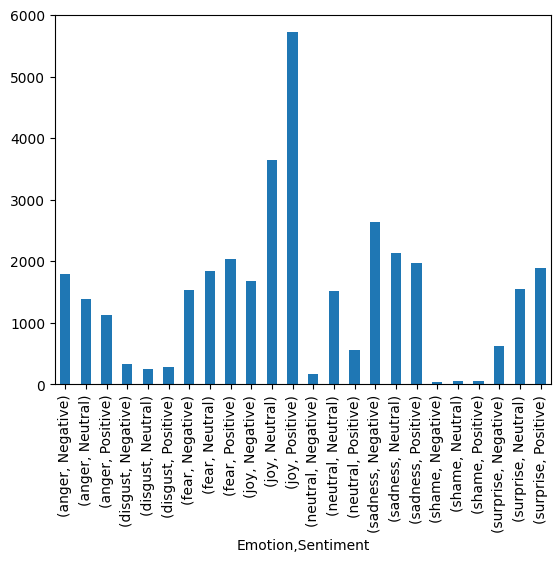

In [516]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

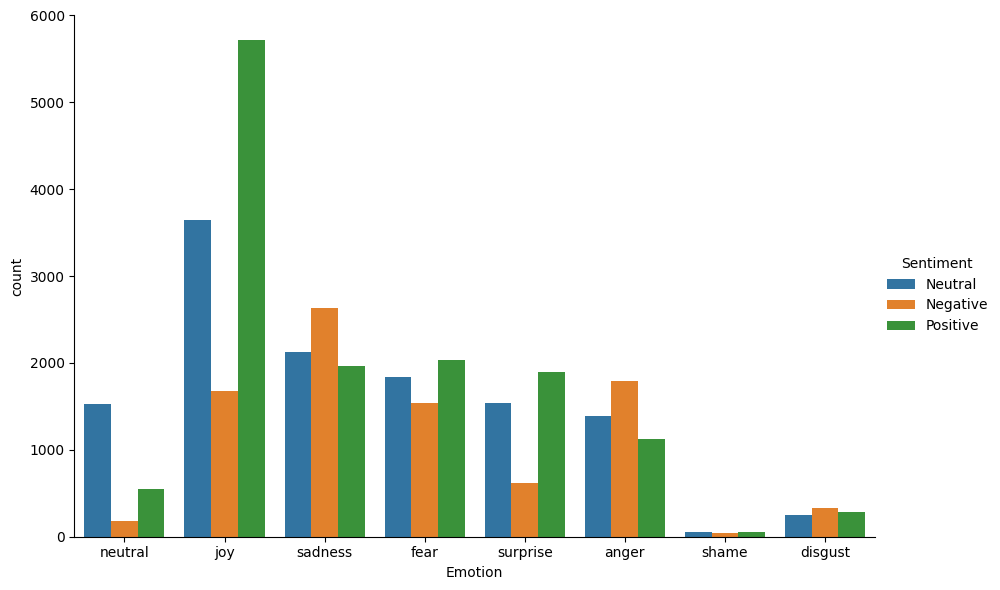

In [517]:
# Create a bar plot using catplot
sns.catplot(x="Emotion", hue="Sentiment", data=df, kind="count", height=6, aspect=1.5)

# Show the plot
plt.show()


From this we can iterpret that for joy emotion most of the statements are positive , similarly for neutral emotion most statements are neutral and for sadness, anger , disgust most of the statements are negetive.

### `Data Cleaning`

For cleaning the data we will be using neattext module.

In [518]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

### `Creating Clean_Text after Removing UserHandles, StopWords, Punctuations`

In [519]:
# Remove User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [520]:
# Remove Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [521]:
# Remove Punctuations
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [522]:
df

Emotion                                               Text Sentiment  \
0       neutral                                             Why ?    Neutral   
1           joy    Sage Act upgrade on my to do list for tommorow.   Neutral   
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  Negative   
3           joy   Such an eye ! The true hazel eye-and so brill...  Positive   
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   Neutral   
...         ...                                                ...       ...   
34787  surprise  @MichelGW have you gift! Hope you like it! It'...  Positive   
34788       joy  The world didnt give it to me..so the world MO...  Positive   
34789     anger                           A man robbed me today .    Neutral   
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...   Neutral   
34791   sadness  I think about you baby, and I dream about you ...   Neutral   

                                              Clean_Text  
0                                                         
1                         Sage Act upgrade list tommorow  
2      WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3      eye  true hazel eyeand brilliant  Regular feat...  
4      ugh babe hugggzzz u  babe naamazed nga ako e b...  
...                                                  ...  
34787         gift Hope like it hand wear  Itll warm Lol  
34788         world didnt meso world DEFINITELY cnt away  
34789                                  man robbed today   
34790                          Youu JEALOUSY #Losing YOU  
34791                              think baby dream time  

[34792 rows x 4 columns]

### `List Of Emotions`

In [523]:
# list of emotions
emotion_list = df['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

### `Creating A List, Docx For Joy`

Now lets check the most common words occuring for joy emotion.

In [524]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()
joy_docx = ' '.join(joy_list)

In [575]:
# joy_docx

### `Keywords in Joy docx`

In [526]:
keyword_joy = extract_keywords(joy_docx)
keyword_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

### `Plotting Most Common Words of Joy Docx`

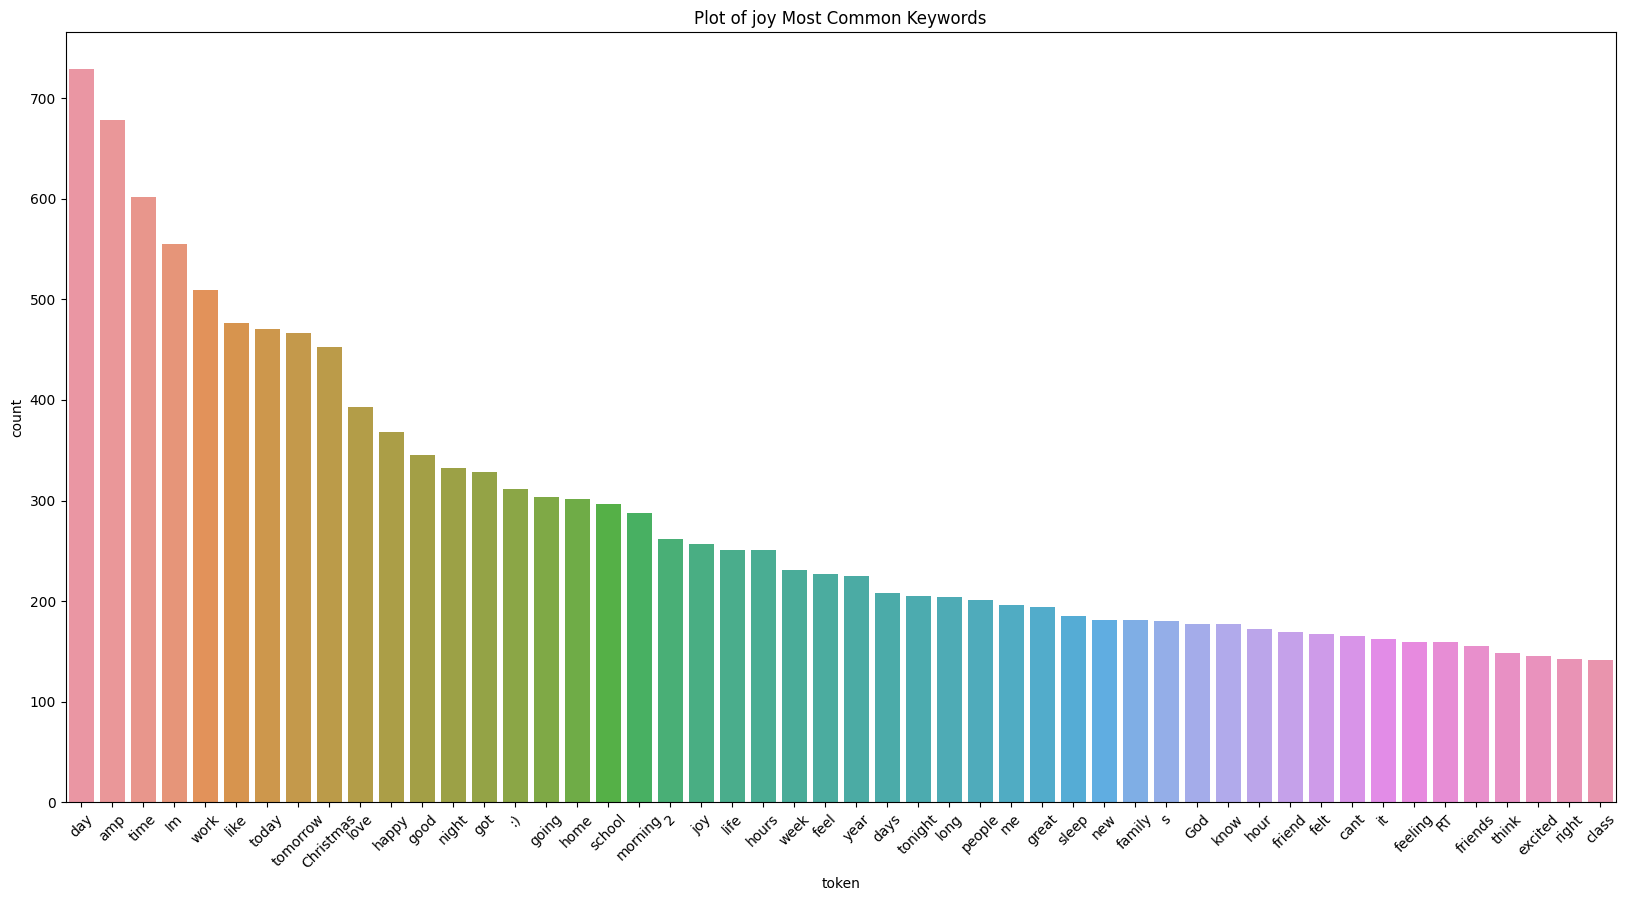

In [527]:
plot_most_common_words(keyword_joy,"joy")

### `Plotting the Word Cloud For Joy Docx`

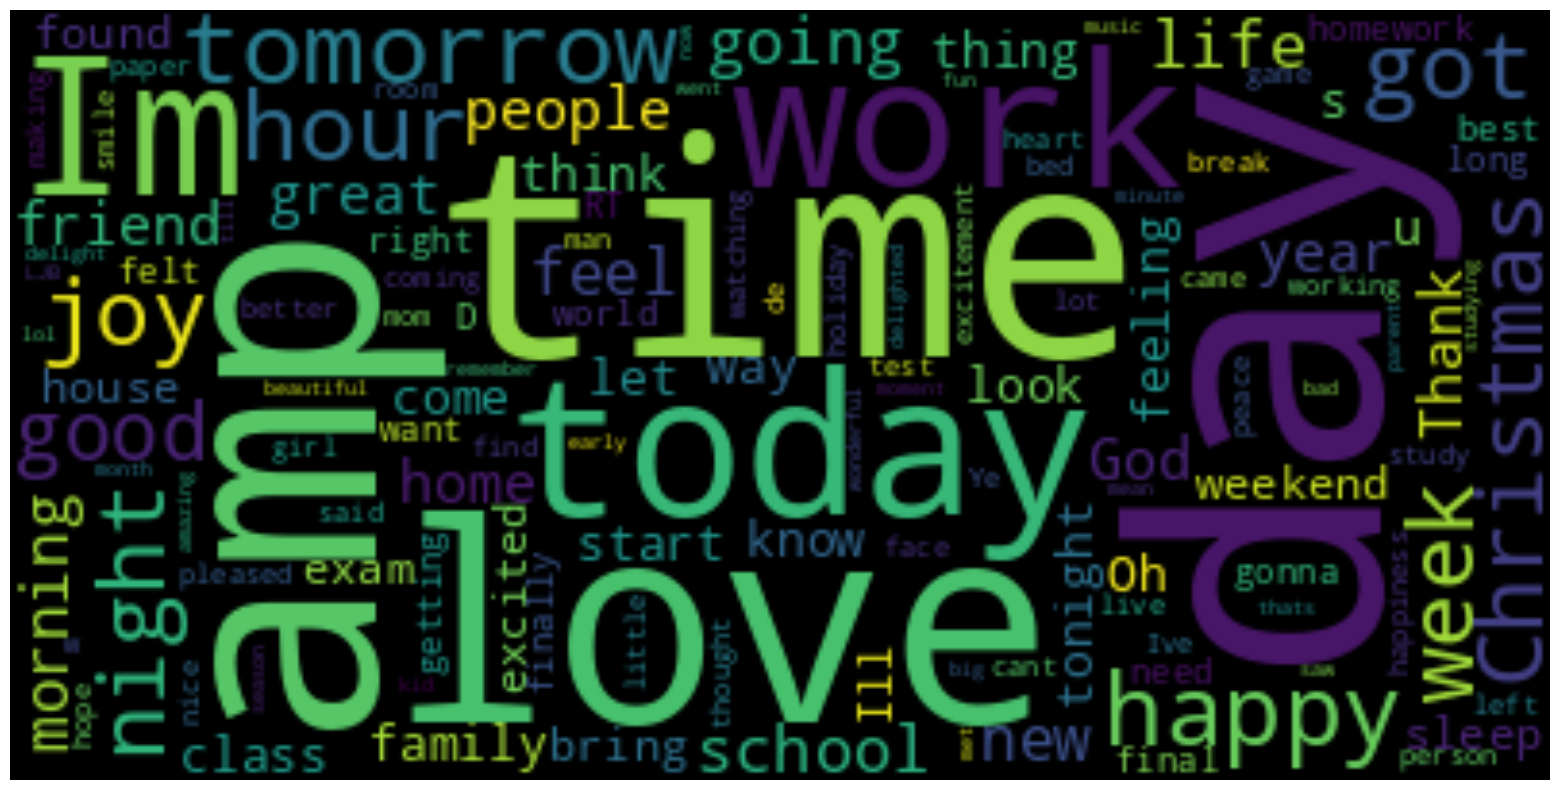

In [528]:
 plot_wordcloud(joy_docx)

This looks good and gives us the idea of which words are mostly used to express joy sentiment.

### `Performing The same for Surprise`

In [529]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
surprise_docx = ' '.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

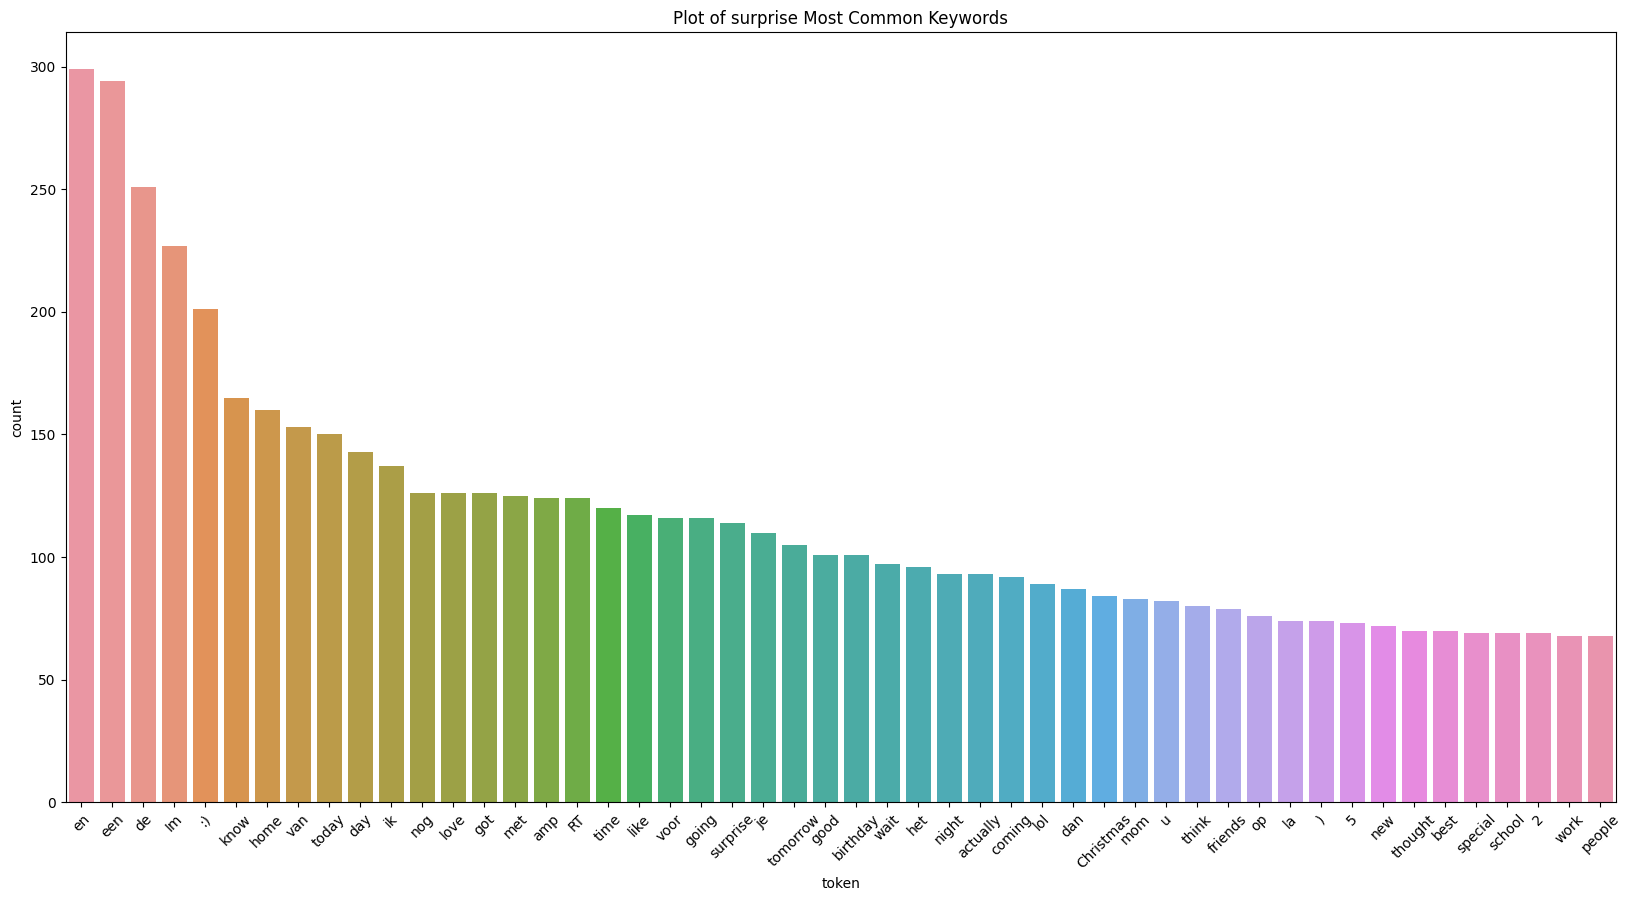

In [530]:
plot_most_common_words(keyword_surprise,"surprise")

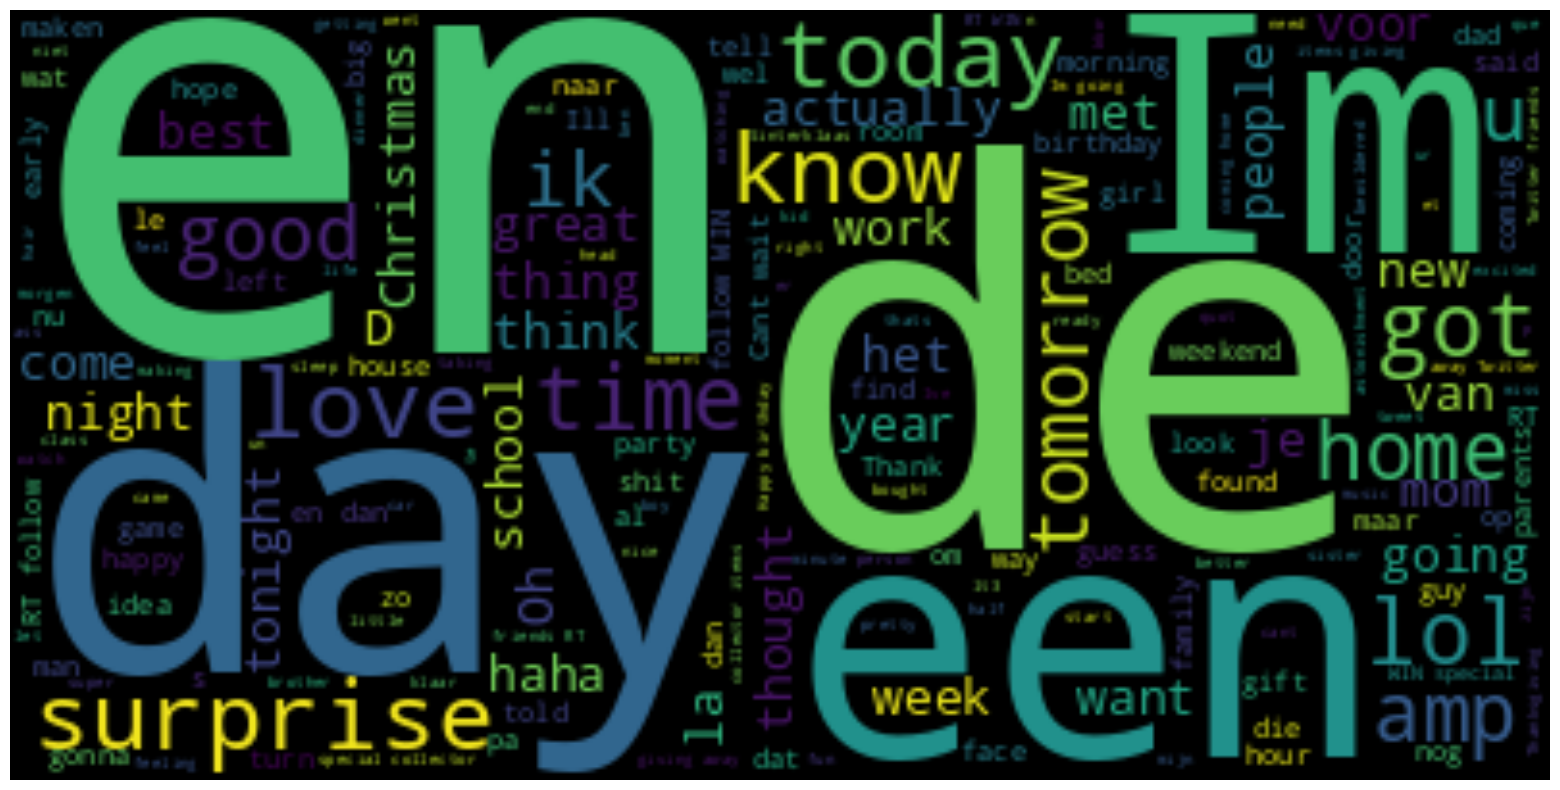

In [531]:
 plot_wordcloud(surprise_docx)

In [532]:
# df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

The joy sentiment wordcloud looked better but after lookin at this wordcloud it is clearly visible that some more data cleaning is required as there are many noises and words with no meaning related to the sentiment.

In [533]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_shortwords)

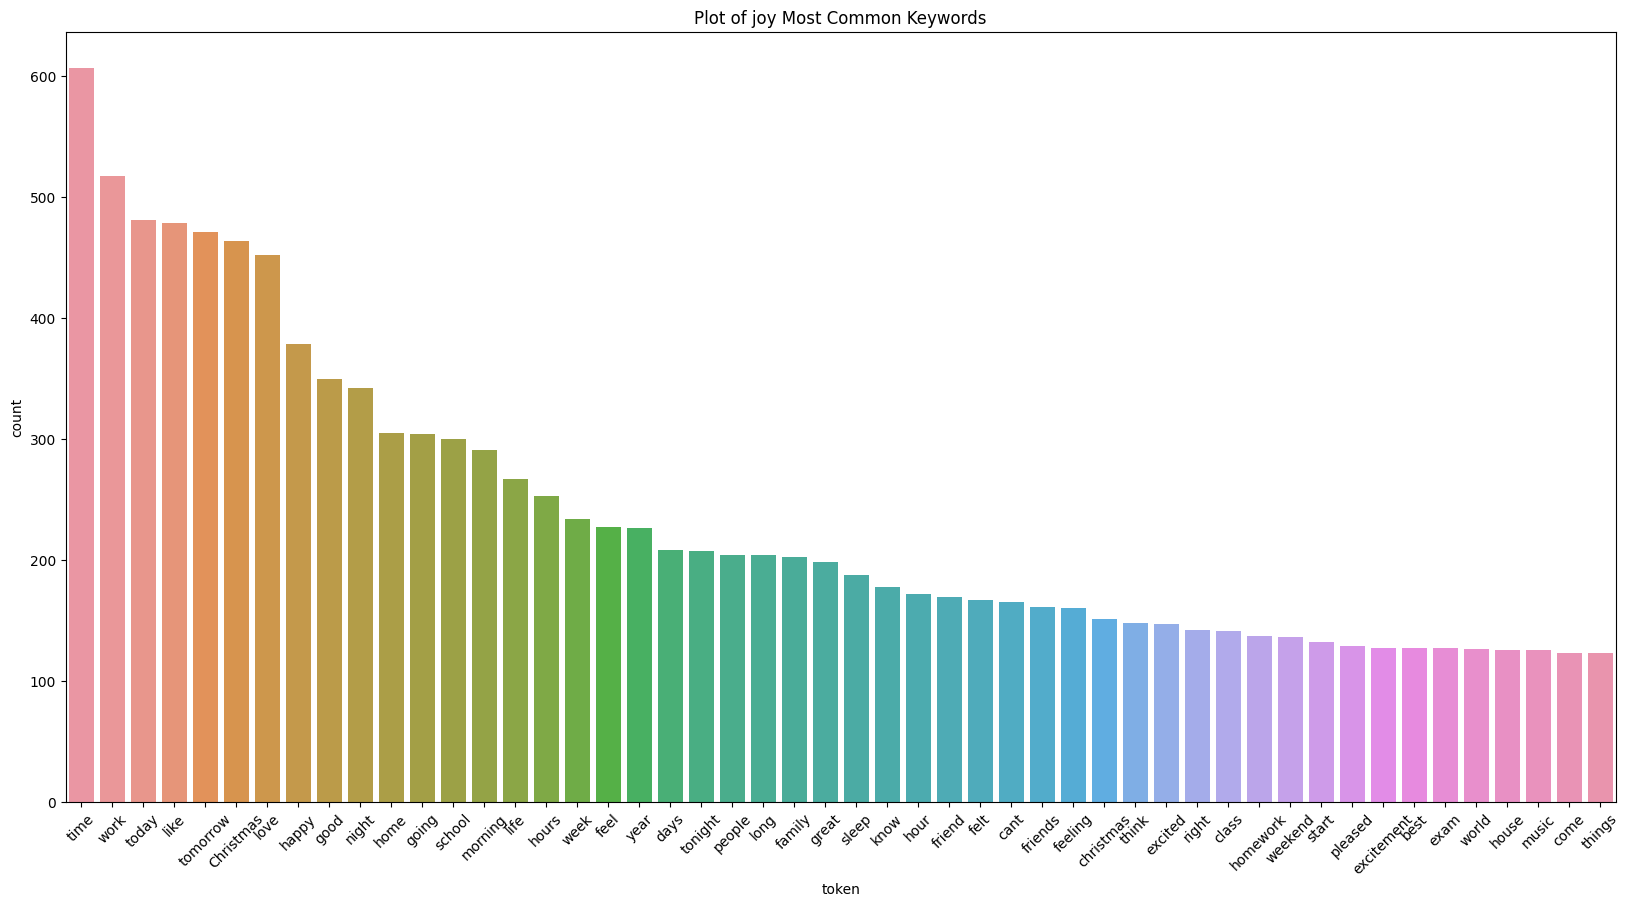

In [534]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()
joy_docx = ' '.join(joy_list)
keyword_joy = extract_keywords(joy_docx)
plot_most_common_words(keyword_joy,"joy")

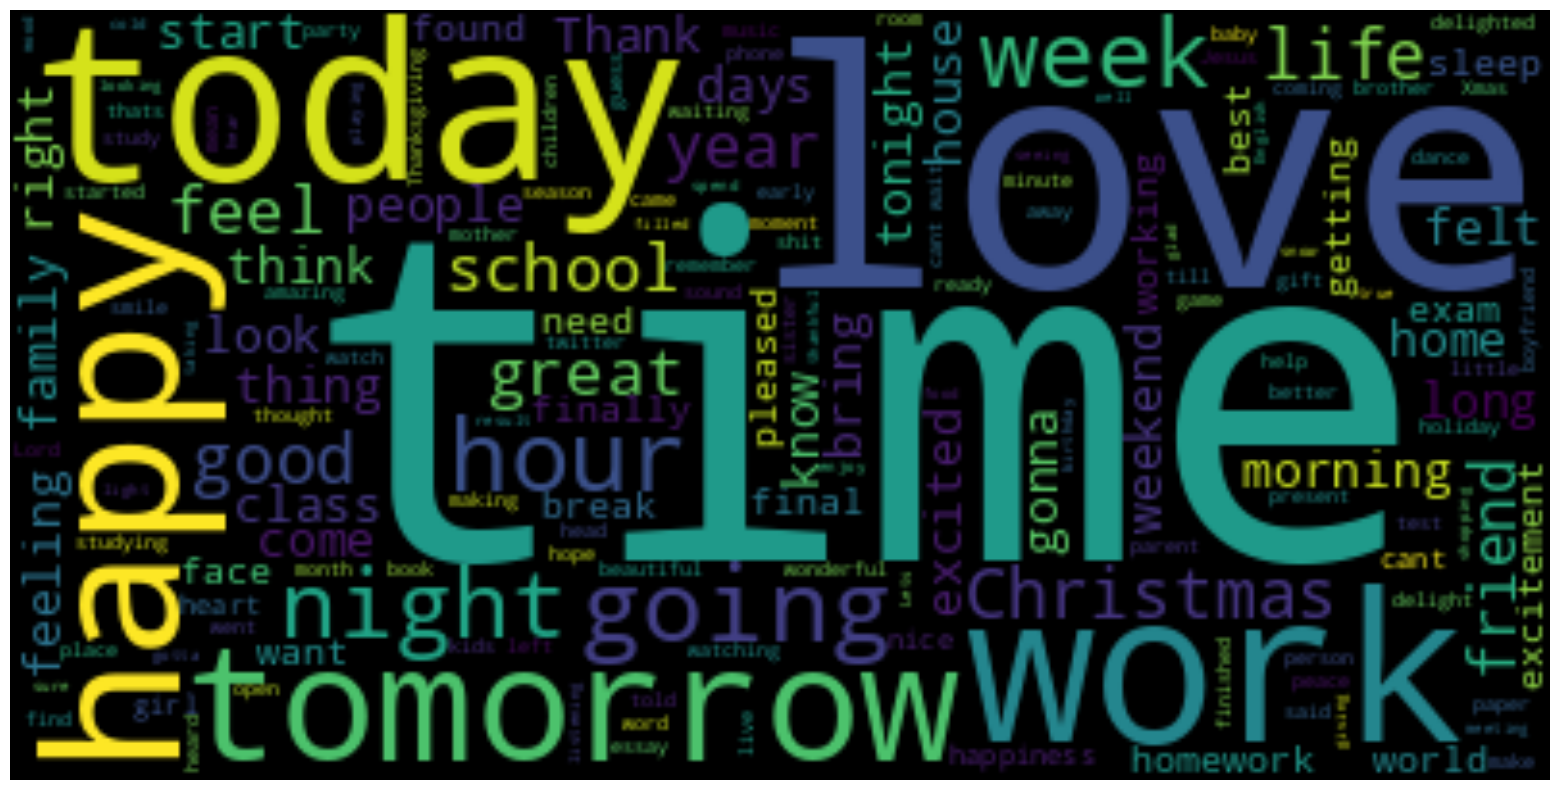

In [535]:
 plot_wordcloud(joy_docx)

This looks much better than the previous ones although i still dont know how the words work and homework can be related to joy :).


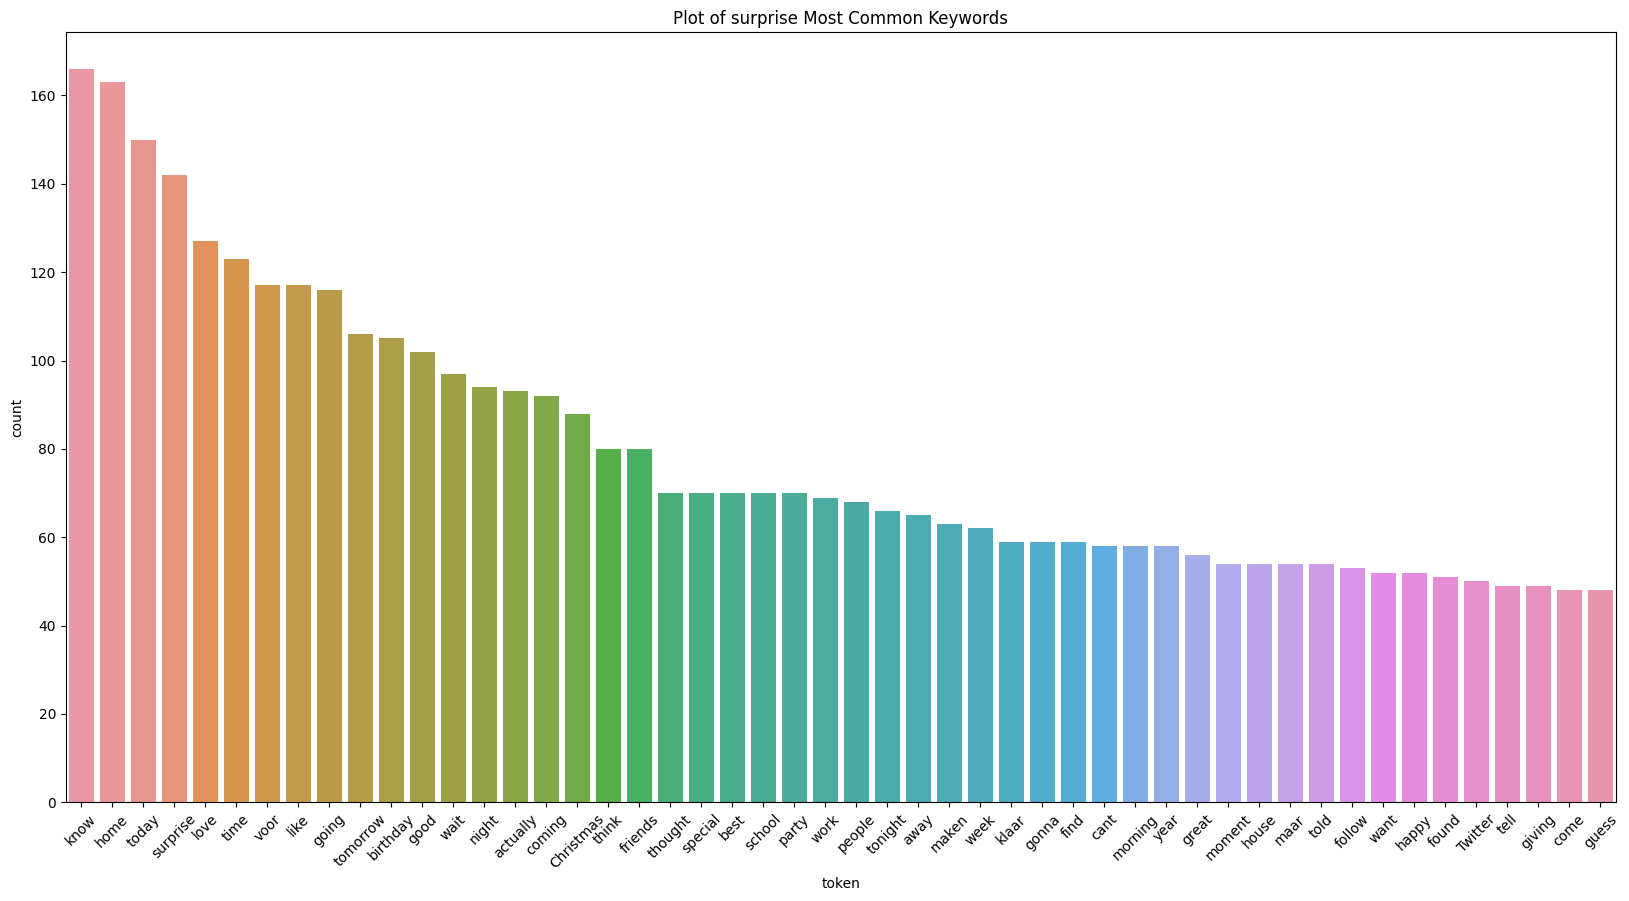

In [536]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
surprise_docx = ' '.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)
plot_most_common_words(keyword_surprise,"surprise")

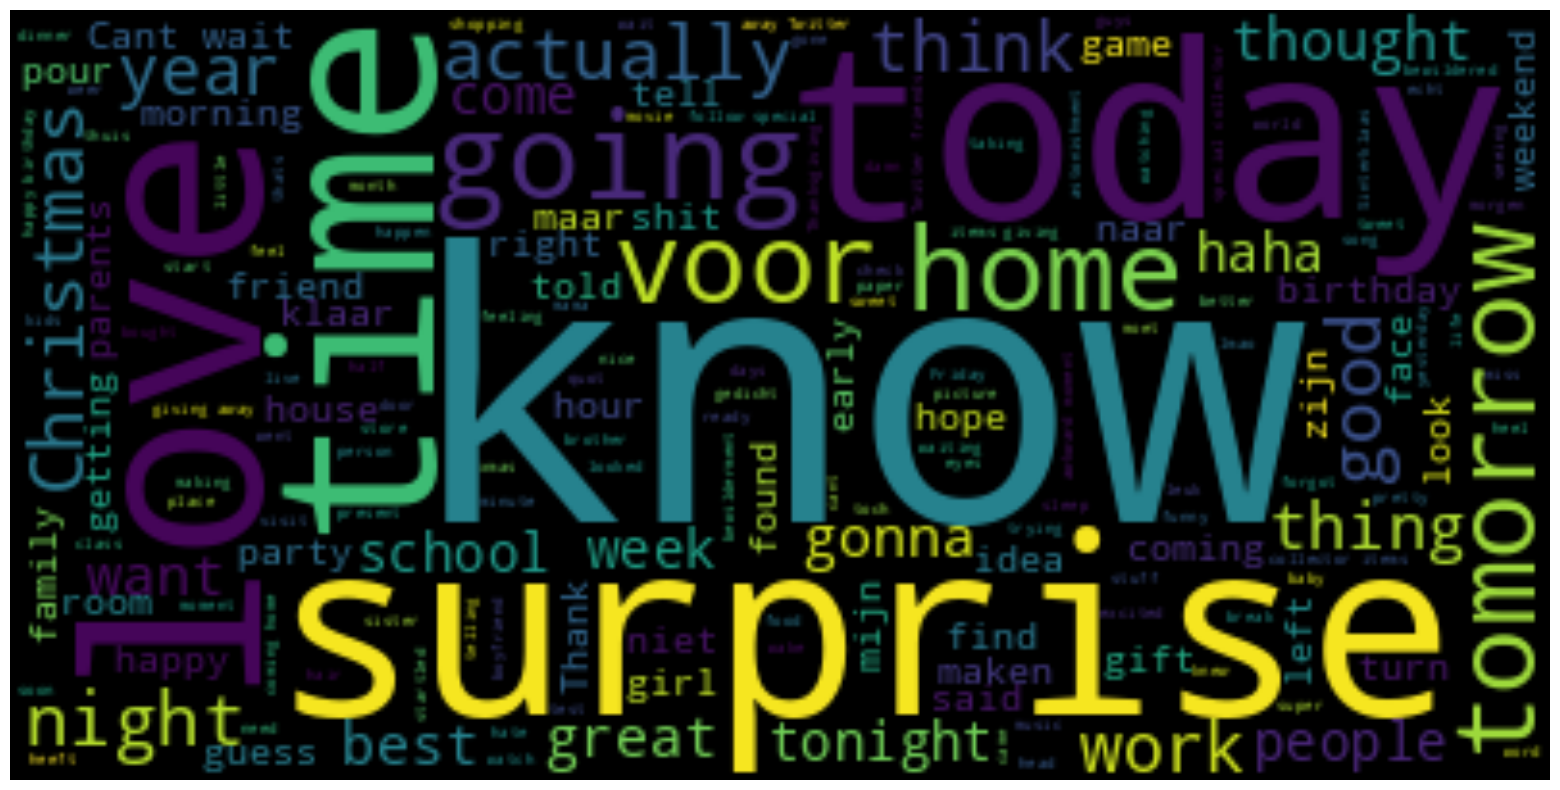

In [574]:
plot_wordcloud(surprise_docx)

This one also contains more meaningfull words than the previous wordcloud for surprise emotion.

# Trying Models
### Now it's time to try simpler models to see what results they are giving based on the data till now.

In [538]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

### *Splitting The dataset into Training , Testing - X,Y axis*

In [539]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)

# 1. **Creating The Logistic Regression Model**



In [540]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create a pipeline with CountVectorizer and a classifier (e.g., Logistic Regression)
pipe_lr = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression())
])


In [541]:
# Train and fit your model
pipe_lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [542]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [543]:
#Check accuracy
pipe_lr.score(x_test,y_test)

0.6054799770070894

In [544]:
y_pred_for_lr = pipe_lr.predict(x_test)

### `Confusion Matrix`

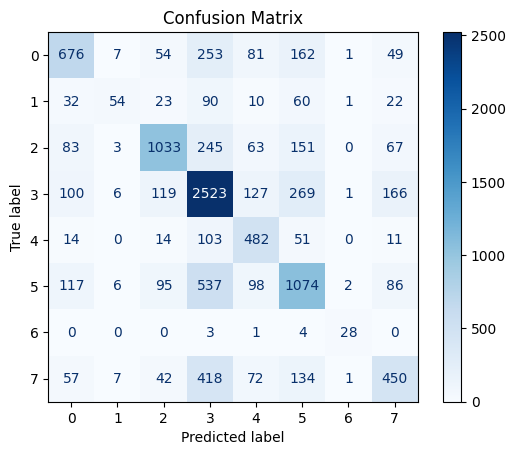

In [545]:
calculate_and_display_confusion_matrix(y_test,y_pred_for_lr)

In [546]:
#Make a prediction
ex1 = "This book was so interesting"

In [547]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

# 2. **Creating The SVM Model**

In [548]:
from sklearn.svm import SVC  # Support Vector Machine

In [549]:
pipe_svm = Pipeline([
    ('cv', CountVectorizer()),
    ('svm', SVC(kernel='rbf'))  # You can choose the kernel you prefer (e.g., 'linear', 'rbf', etc.)
])

In [550]:
pipe_svm.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('svm', SVC())])

In [551]:
#Check accuracy
pipe_svm.score(x_test,y_test)

0.5966660279747078

In [552]:
y_pred_for_svc = pipe_svm.predict(x_test)

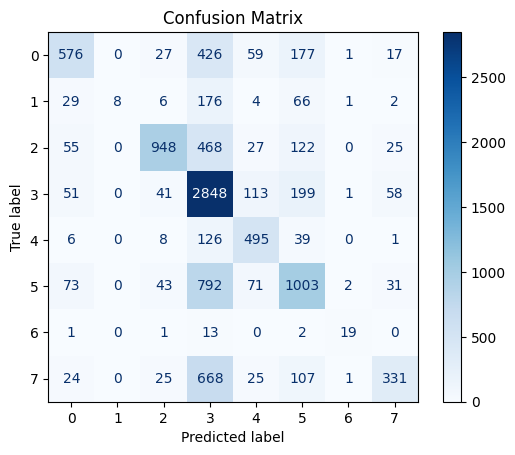

In [553]:
calculate_and_display_confusion_matrix(y_test,y_pred_for_svc)

# 3. **Creating The RandomForestClassifier Model**

In [554]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ('cv', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

In [555]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])

In [556]:
#Check accuracy
pipe_rf.score(x_test,y_test)

0.5546081624832343

In [557]:
y_pred_for_rf = pipe_svm.predict(x_test)

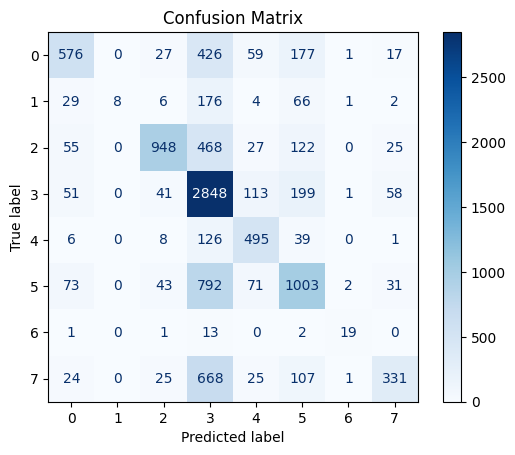

In [558]:
calculate_and_display_confusion_matrix(y_test,y_pred_for_svc)

In all the three models above the score is almost around 55-60%. Which is desent but after looking at the confusion matrix we can see that most of the prediction are just joy sentiment (30% of ~35000 cases which is aproximatly 10500) and the model is predicting almost 5500 to be joy sentiment. Which is the reason low score and inconsistent confusion matrix.

# Complet Pipeline for test data

Completing the pipeline and trying our own text inputs will give some clear idea of the problemsin the model.

In [559]:
from sklearn.base import BaseEstimator, TransformerMixin

# This will remove all the noises and waste material in the text input data

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_processed = X.apply(nfx.remove_userhandles)
        X_processed = X_processed.apply(nfx.remove_stopwords)
        X_processed = X_processed.apply(nfx.remove_punctuations)
        X_processed = X_processed.apply(nfx.remove_special_characters)
        X_processed = X_processed.apply(nfx.remove_shortwords)
        return X_processed

data_proccesing = Pipeline([
    ('preprocessor', TextPreprocessor()),  # Custom text preprocessing transformer
])

Cross checking with the already existing texts.


In [560]:
# Here using RandomForests model as the final model we get
final_model = pipe_rf

test_statements = pd.Series([
    "@Ally1kinobi thought I'd stop by and say I CAN SPEND CHRISTMAS HOLIDAYS WITH YOU NOW AT THE LAKE. Miss you!",
    '"Good morning , Jim ! "',
    "Not afraid of tomorrow for I saw yesterday and I love today #less",
    "They soud like the neighbours from hell ! "
])

processed_data = data_proccesing.fit_transform(test_statements)
predictions = final_model.predict(processed_data)
predictions

array(['surprise', 'joy', 'fear', 'anger'], dtype=object)

In [561]:
processed_data

0    thought stop SPEND CHRISTMAS HOLIDAYS LAKE Miss
1                                       Good morning
2          afraid tomorrow yesterday love today less
3                          soud like neighbours hell
dtype: object

In [562]:
def final_pipeline(text_col,model):
  final_model = model
  processed_data = data_proccesing.fit_transform(test_statements)
  predictions = final_model.predict(processed_data)
  return predictions

Trying our own text to try and break the model.


In [563]:
test_statements = pd.Series([
    "Hello",
    "Happy to see you",
    "You are the worst",
    "never seen someone as bad as you",
    "you are not so good at it :)"
])

final_pipeline(test_statements,pipe_lr)

array(['neutral', 'joy', 'anger', 'joy', 'neutral'], dtype=object)

The biggest issue we are facing here is that the algorithm is taking note of individual words and not the complete meaning of the sentense. And other issue is that the dataset is not evenly distributed for all the emotions to have sufficient data to train the model correctly.

# Phase 2